# **Predicting Breast Cancer using Machine Learning**

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of breast cancer classification.

**This notebook is only intended for a practical purpose of my studies in Machine Learning as a beginner.**

## **What is classification?**

**Classification** involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

## **What we are Gonna Study?**

In this notebook we are gonna study the following topics:

* **Exploratory Data Analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model Training** - create model(s) to learn to predict a target variable based on other variables.
* **Model Evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model Comparison** - comparing several different models to find the best one.
* **Model Fine-Tuning** - once we've found a good model, how can we improve it?
* **Feature Importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-Validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?



---

## **Problem Definition**

In this case of study, we will be exploring a **binary classification** dataset.

As the main objective, we're going to get the best prediction possible by using all the features and datas that were given to us through the following dataset.

**Statement**

> Given clinical parameters about a patient, can we predict whether or not they have breast cancer?

## **Dataset Description**

This dataset describe characteristics of the cell nuclei present in the image.Separating plane described above was obtained using ***Multisurface Method-Tree (MSM-T)*** *K. P. Bennett, "Decision Tree\nConstruction Via Linear Programming."* 

Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. 

Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane\nin the 3-dimensional space is that described in: *K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34.*

This database is also available through the UW CS ftp server:\n\nftp ftp.cs.wisc.edu\ncd math-prog/cpo-dataset/machine-learn/WDBC/

### **References**   
- W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on \n     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,\n     San Jose, CA, 1993.   
- O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.   
- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques  to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

### **All the Directors  Reserverd**

**Distribution:** 212 - Malignant, 357 - Benign   

**Creator:**  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

**Donor: **Nick Street   **Date:** November, 1995

**This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.**

---

### **Dataset Characteristics**

```
- Radius (mean of distances from center to points on the perimeter)       
- Texture (standard deviation of gray-scale values)   
- Perimeter  
- Area     
- Smoothness (local variation in radius lengths)       
- Compactness (perimeter^2 / area - 1.0)       
- Concavity (severity of concave portions of the contour)        
- Concave Points (number of concave portions of the contour)        
- Symmetry       
- Fractal Dimension ("coastline approximation" - 1)   
```

> **Dimensionality: (569, 30)**

> **The summary statics that contains all the parameters will be showed as the notebook follows.**

In a classification context, this is a well posed problem with **"Malignant"** and **"Benign"** class structures.

---

## **What is a Feature in Machine Learning?**

In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon. Choosing informative, discriminating and independent features is a crucial element of effective algorithms in pattern recognition, classification and regression.

## **Evaluation**

Using differents types od models we are gonna try to evaluate / classificate the dataset of breast cancer datas.

Originally used as an example data set on which Fisher's linear discriminant analysis was applied, it became a typical test case for many statistical classification techniques in machine learning such as support vector machines.

**In this project we will use this case for studies and learning purposes.**

## **Legend**

> **Target values:**
* **0 - Malignant Case**  
* **1 - Benign Case**

## **Dataset and Dataset Features**

The dataset contains a set of **569 records** under **30 attributes** :

- **Mean Radius, Mean Texture, Mean Perimeter, Mean Area, Mean Smoothness, Mean Compactness, Mean Concavity, Mean Concave Points, Mean Symmetry, Mean Fractal Dimension** 

- **Radius Error, Texture Error, Perimeter Error, Area Error, Smoothness Error, Compactness Error, Concavity Error, Concave Points Error, Symmetry Error, Fractal Dimension Error**

- **Worst Radius, Worst Texture, Worst Perimeter, Worst Area, Worst Smoothness, Worst Compactness, Worst Concavity, Worst Concave Points, Worst Symmetry, Worst Fractal Dimension**	

You can find the original data set in the Machine Learning package [Scikit - Learn page](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

---

In [40]:
# Regular EDA and Plotting Libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

## Model Evaluators
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
# load the breast_cancer dataset
from sklearn.datasets import load_breast_cancer
load_breast_cancer = load_breast_cancer()

In [42]:
# creating breast_cancer dataframe
def dataframe():
  data = load_breast_cancer.data
  feature_names = load_breast_cancer.feature_names
  target = load_breast_cancer.target
  target_names = load_breast_cancer.target_names

  breast_cancer = pd.DataFrame(data, columns = feature_names)
  breast_cancer['target'] = target
  breast_cancer['classification'] = pd.Categorical(target_names[target])

  return breast_cancer

In [43]:
# creating dataframe
breast_cancer = dataframe()

In [44]:
# checking the first 10 rows
breast_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,classification
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0,malignant
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0,malignant
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0,malignant
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0,malignant
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0,malignant


In [ ]:
# Generate descriptive statistics. 
breast_cancer_describe = breast_cancer.describe()
breast_cancer_describe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# checking for any Missing / NaN values
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 non-null    float64 
 14  smoothness

---

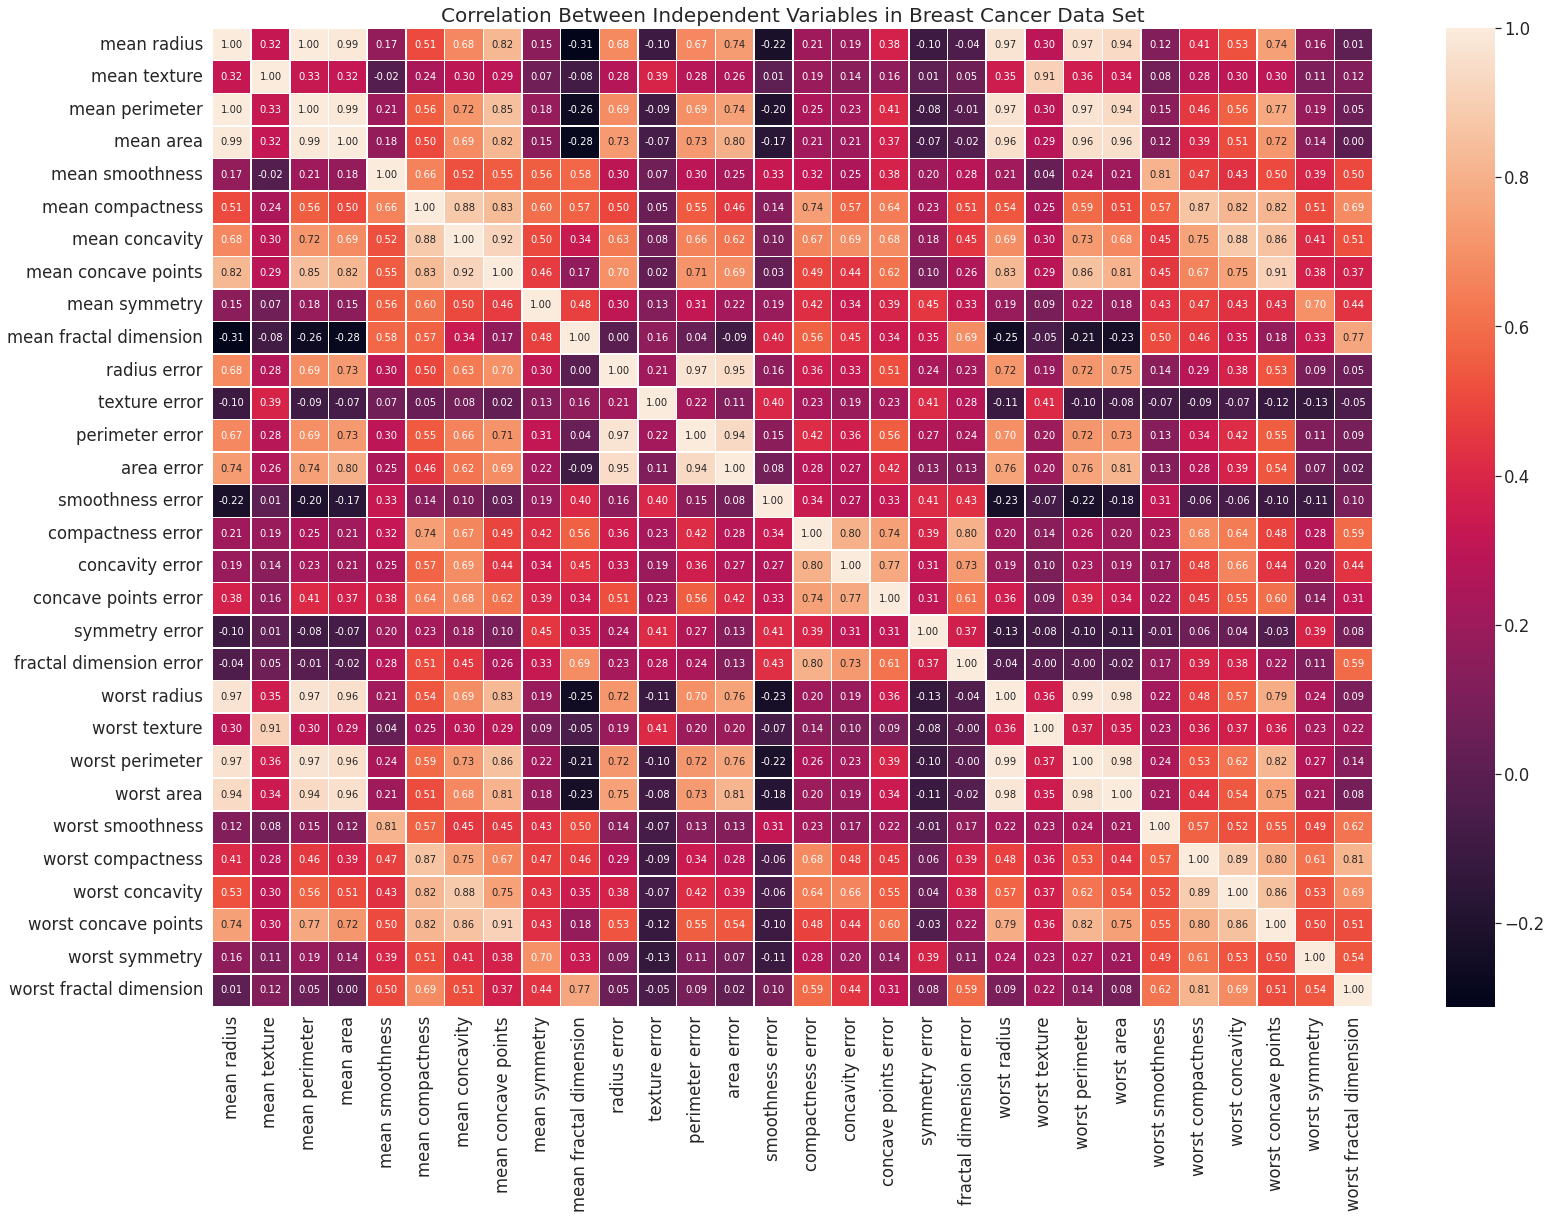

In [ ]:
# Correlation between independent variables
'''
This may give an idea of which independent variables may or may not have an impact on our target variable.
'''
corr_matrix = breast_cancer.drop(['target', 'classification'], axis = 1).corr()
plt.figure(figsize=(26, 18))
sns.heatmap(corr_matrix, annot=True,  linewidths=0.5, fmt= ".2f");
plt.title('Correlation Between Independent Variables in Breast Cancer Data Set', fontsize=20);

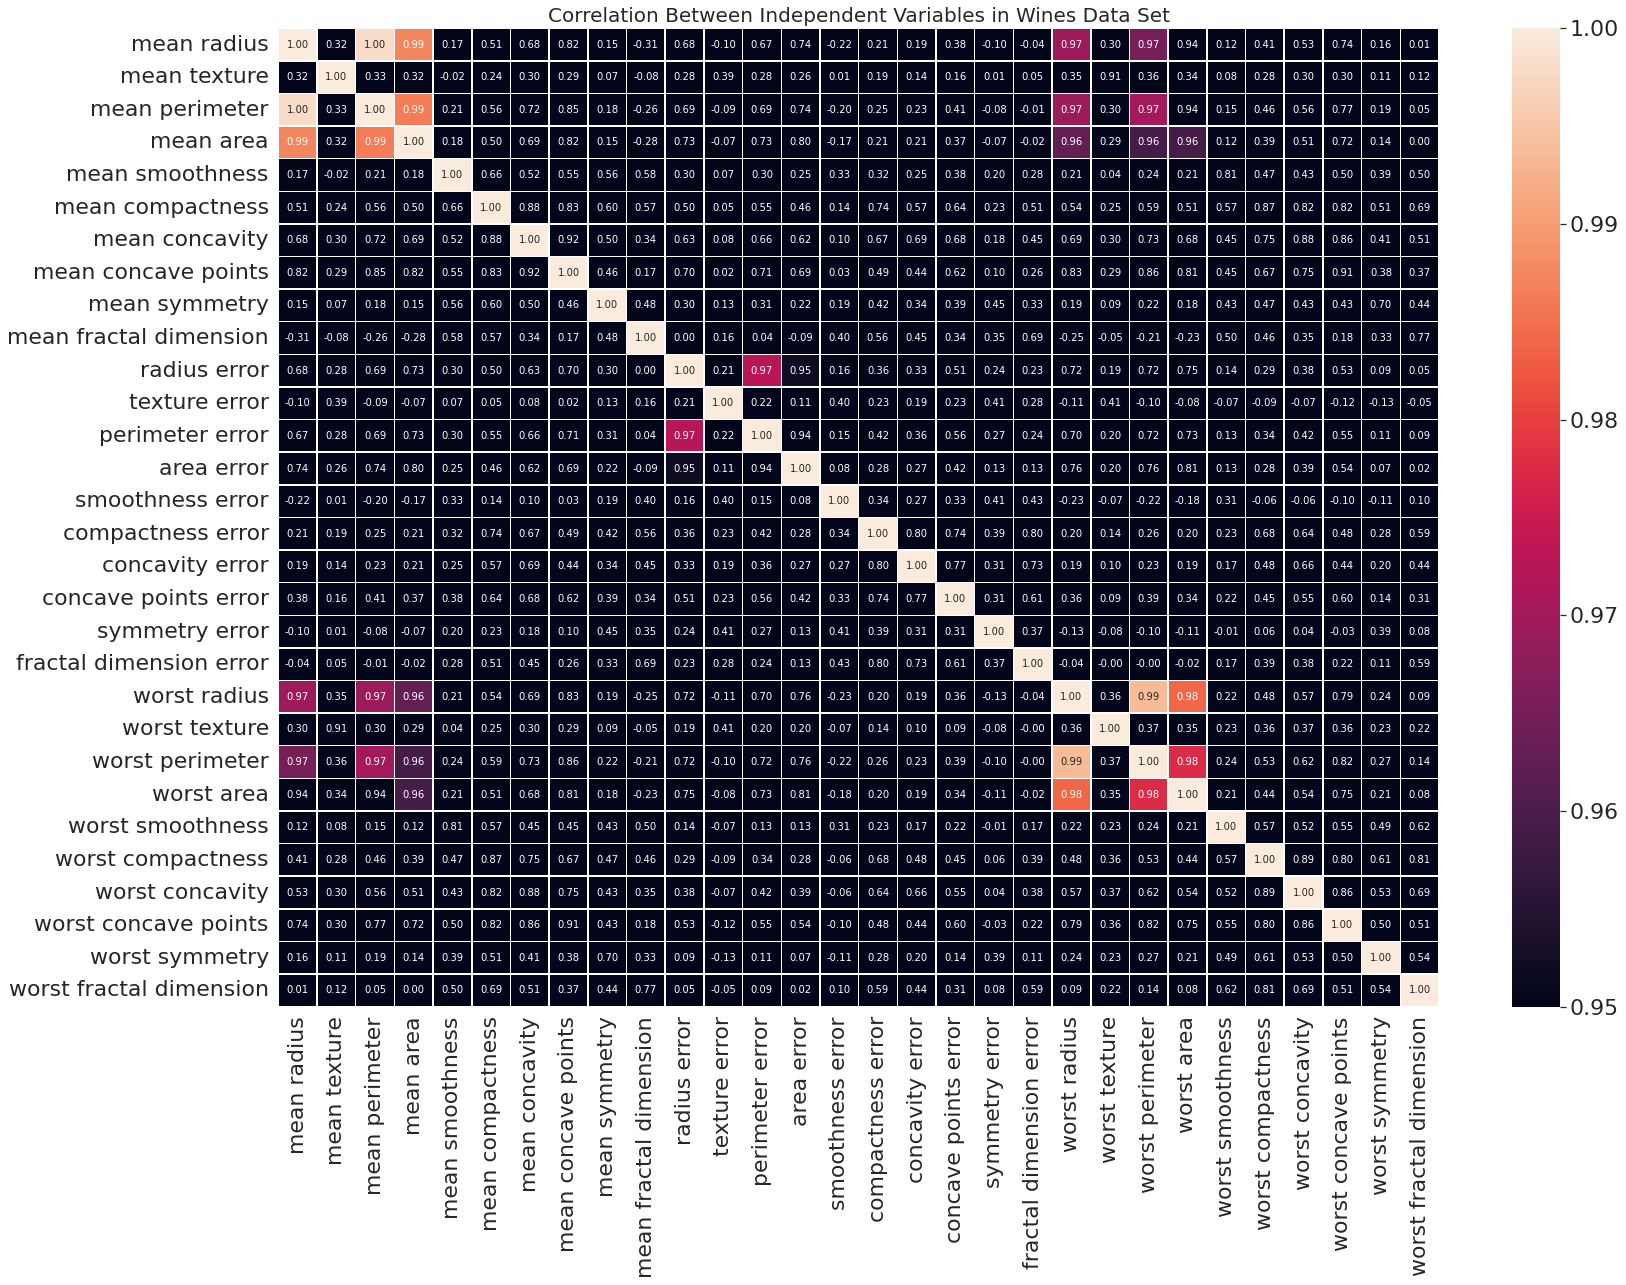

In [ ]:
# for a better visualization, we can set to highlight only correlation values higher than 0.95
'''
This may give an idea of which independent variables have bigger impact on target variable.
'''
corr_matrix = breast_cancer.drop(['target', 'classification'], axis = 1).corr()
plt.figure(figsize=(26, 18))
sns.heatmap(corr_matrix, annot=True,  linewidths=0.5, fmt= ".2f", vmin = 0.95);
plt.title('Correlation Between Independent Variables in Wines Data Set', fontsize=20);

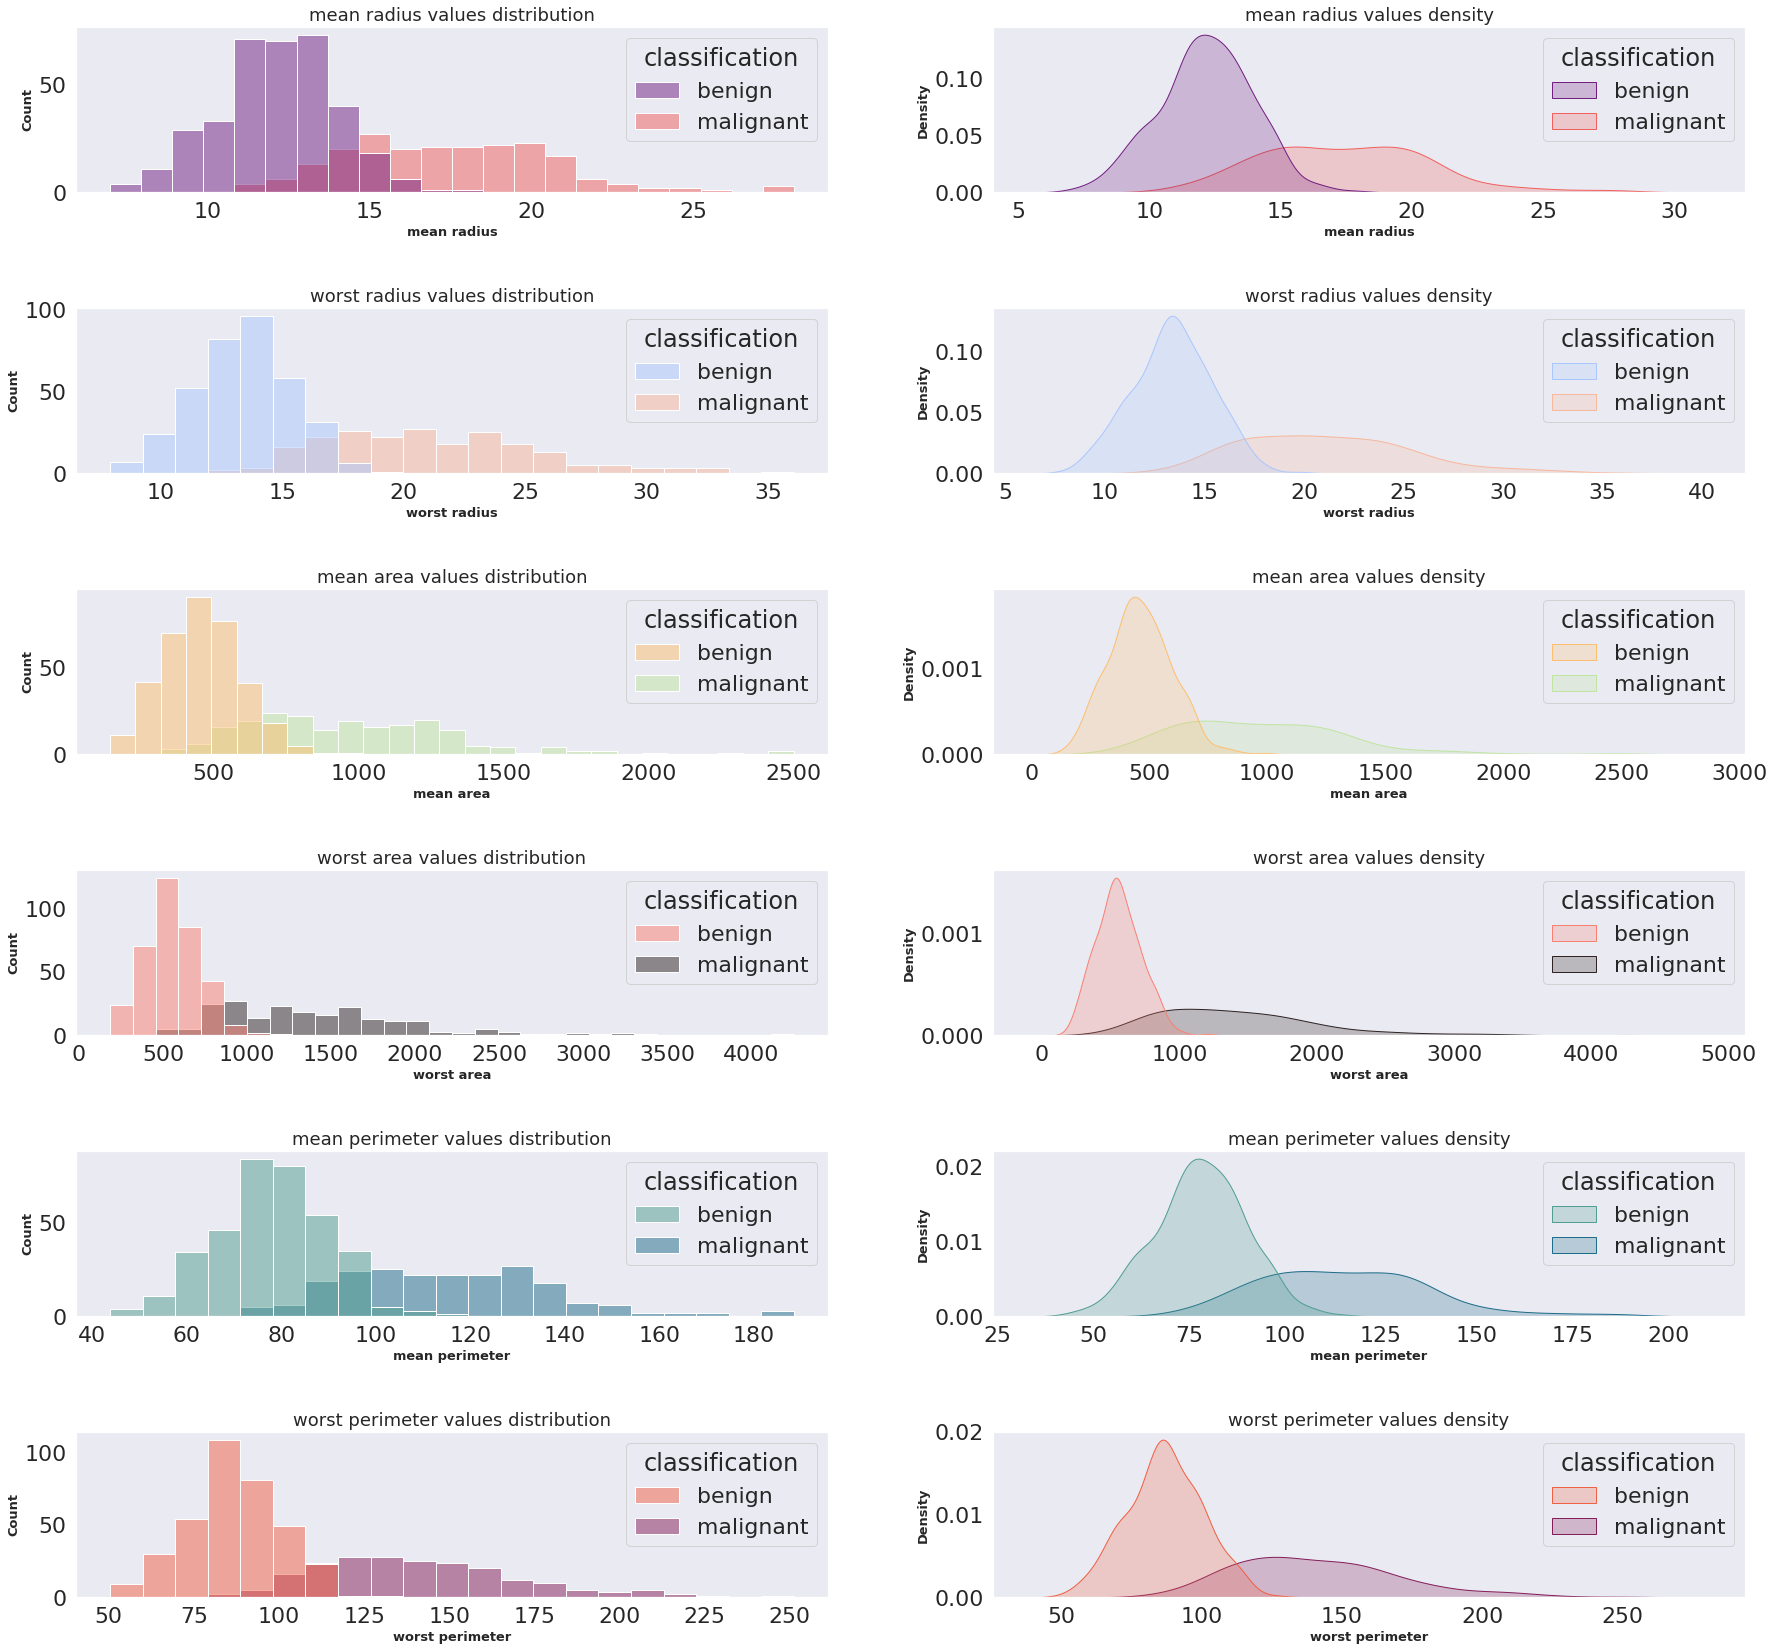

In [ ]:
# checking how ['mean radius','worst radius', 'mean area', 'worst area', 'mean perimeter','worst perimeter'] features are distributed in the data set 

fig, axs = plt.subplots(nrows = 6, ncols = 2, figsize = (26,24))

sns.histplot(data = breast_cancer, x = 'mean radius', hue = 'classification', palette = 'magma', ax = axs[0][0])
sns.kdeplot(data = breast_cancer, x = 'mean radius',  hue = 'classification', palette = 'magma', shade = True, ax = axs[0][1]);

sns.histplot(data = breast_cancer, x = 'worst radius', hue = 'classification', palette = 'coolwarm', ax = axs[1][0])
sns.kdeplot(data = breast_cancer, x = 'worst radius', hue = 'classification',palette = 'coolwarm', shade = True, ax = axs[1][1])

sns.histplot(data = breast_cancer, x = 'mean area', hue = 'classification',palette = 'Spectral', ax = axs[2][0])
sns.kdeplot(data = breast_cancer, x = 'mean area', hue = 'classification',palette = 'Spectral', shade = True, ax = axs[2][1])

sns.histplot(data = breast_cancer, x = 'worst area', hue = 'classification',palette = 'dark:salmon_r', ax = axs[3][0])
sns.kdeplot(data = breast_cancer, x = 'worst area', hue = 'classification',palette = 'dark:salmon_r', shade = True, ax = axs[3][1])

sns.histplot(data = breast_cancer, x = 'mean perimeter',hue = 'classification', palette = 'crest', ax = axs[4][0])
sns.kdeplot(data = breast_cancer, x = 'mean perimeter', hue = 'classification',palette = 'crest', shade = True, ax = axs[4][1])

sns.histplot(data = breast_cancer, x = 'worst perimeter', hue = 'classification',palette = 'rocket_r', ax = axs[5][0])
sns.kdeplot(data = breast_cancer, x = 'worst perimeter', hue = 'classification',palette = 'rocket_r', shade = True, ax = axs[5][1])

# styles and configurations
sns.set_style('dark')
fig.tight_layout(pad = 5.0)

labels = ['mean radius','worst radius', 'mean area', 'worst area', 'mean perimeter','worst perimeter']
labels_index = 0

for row in range(6):
  for col in range(2):
    ylabel_text = 'Count' if not col else 'Density'
    title_text = 'distribution' if not col else 'density'
    axs[row][col].set_title(f"{labels[labels_index]} values {title_text}", fontsize = 18)
    axs[row][col].set_xlabel(labels[labels_index], fontsize = 13, weight = 'bold')
    axs[row][col].set_ylabel(ylabel_text, fontsize = 13, weight = 'bold')
  labels_index += 1

In [ ]:
def selected_features_displots(feature, palette_index):
  # splitting selected features to display in distplot chart
  radius_features = breast_cancer.loc[:, [f'mean {feature}', f'worst {feature}', 'classification']]

  # convert the dataframe from wide to long form
  dfm = radius_features.melt(id_vars='classification', var_name='Feature', value_name = 'value')

  # plotting displot chart
  g = sns.displot(kind='kde', data=dfm, col='Feature', col_wrap=2, x='value', hue='classification', 
                  facet_kws={'sharey': False, 'sharex': False},  height=8, multiple="fill", clip=(0, None), palette= 'ch:s=-.2,r=.6')

  # styles and configurations
  g.set_xlabels(fontsize = 17)
  g.set_ylabels(fontsize = 17)
  sns.set(font_scale=1.5)

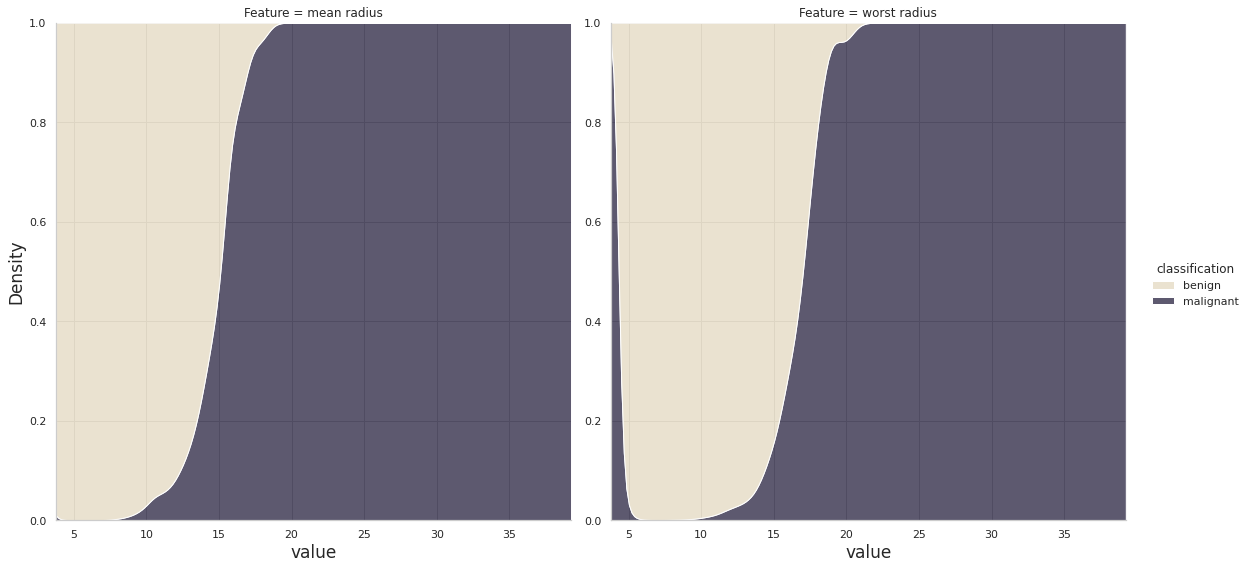

In [ ]:
# checking average radius and worst ray density according to distplot plot
selected_features_displots('radius', 0)

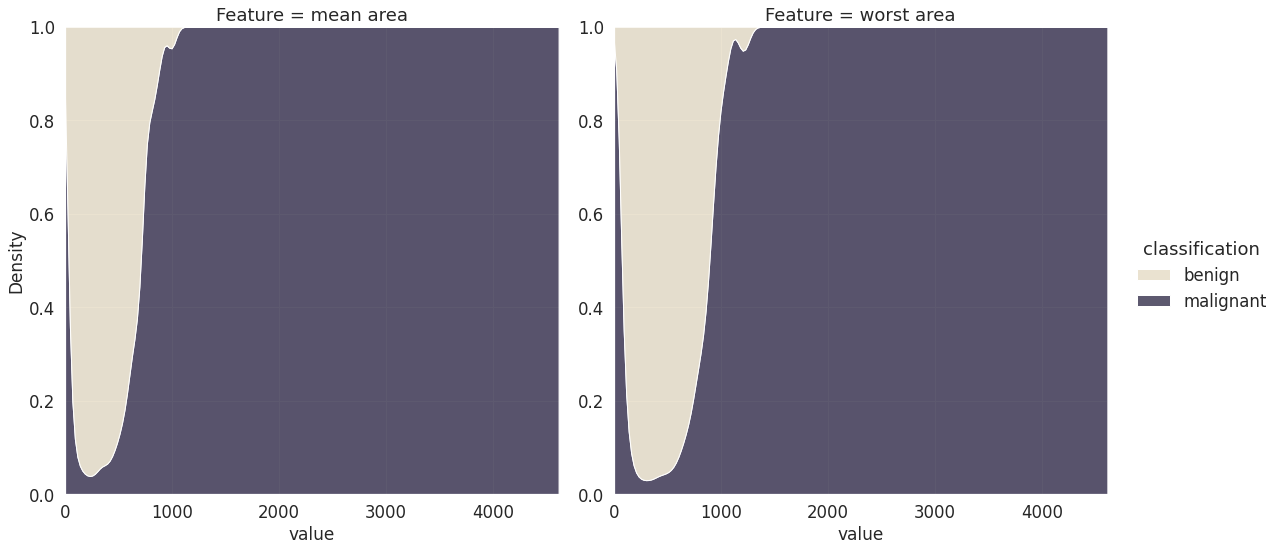

In [ ]:
# checking average area and worst area density according to distplot plot
selected_features_displots('area', 1)

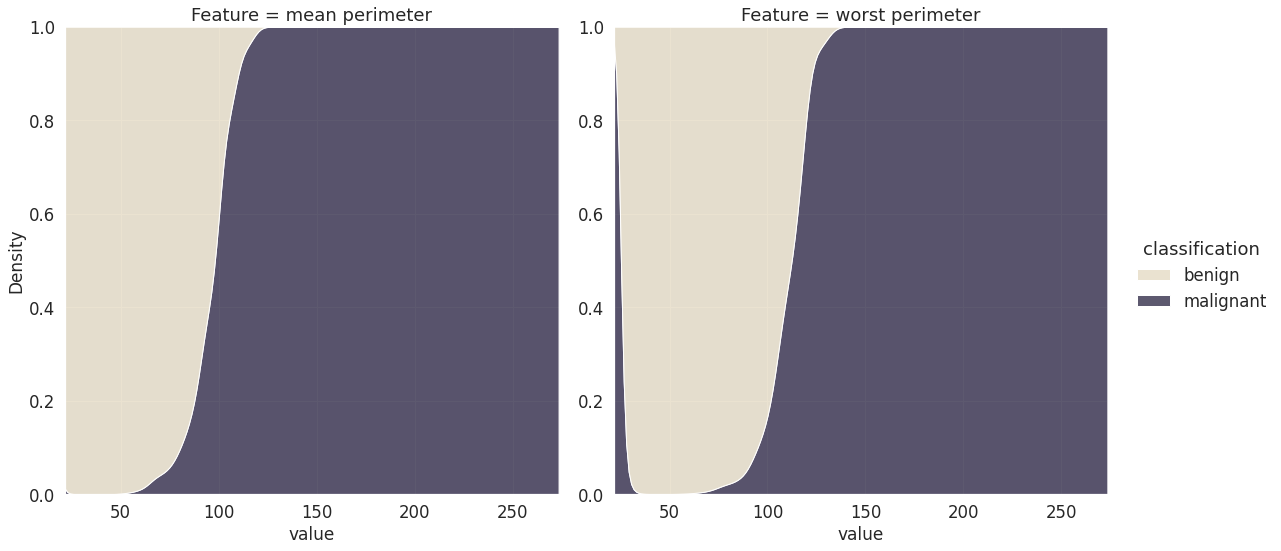

In [ ]:
# checking average perimeter and worst perimeter density according to distplot plot
selected_features_displots('perimeter', 2)

In [57]:
def selected_feature_scatterplot(feature):
  # Draw a scatter plot while assigning point colors and sizes to different
  fig = plt.figure(figsize=(20, 14))
  g = sns.scatterplot(x=f"mean {feature}", y=f"worst {feature}", data=breast_cancer, hue="classification", size=f"mean {feature}", palette="ch:r=-.2,d=.3_r", sizes=(10, 100), linewidth=0)

  # styles and configurations
  g.set(xscale="log", yscale="log")
  g.xaxis.grid(True, "minor", linewidth=.25)
  g.yaxis.grid(True, "minor", linewidth=.25)
  sns.despine(fig, left=True, bottom=True)
  sns.set_theme(style="whitegrid")

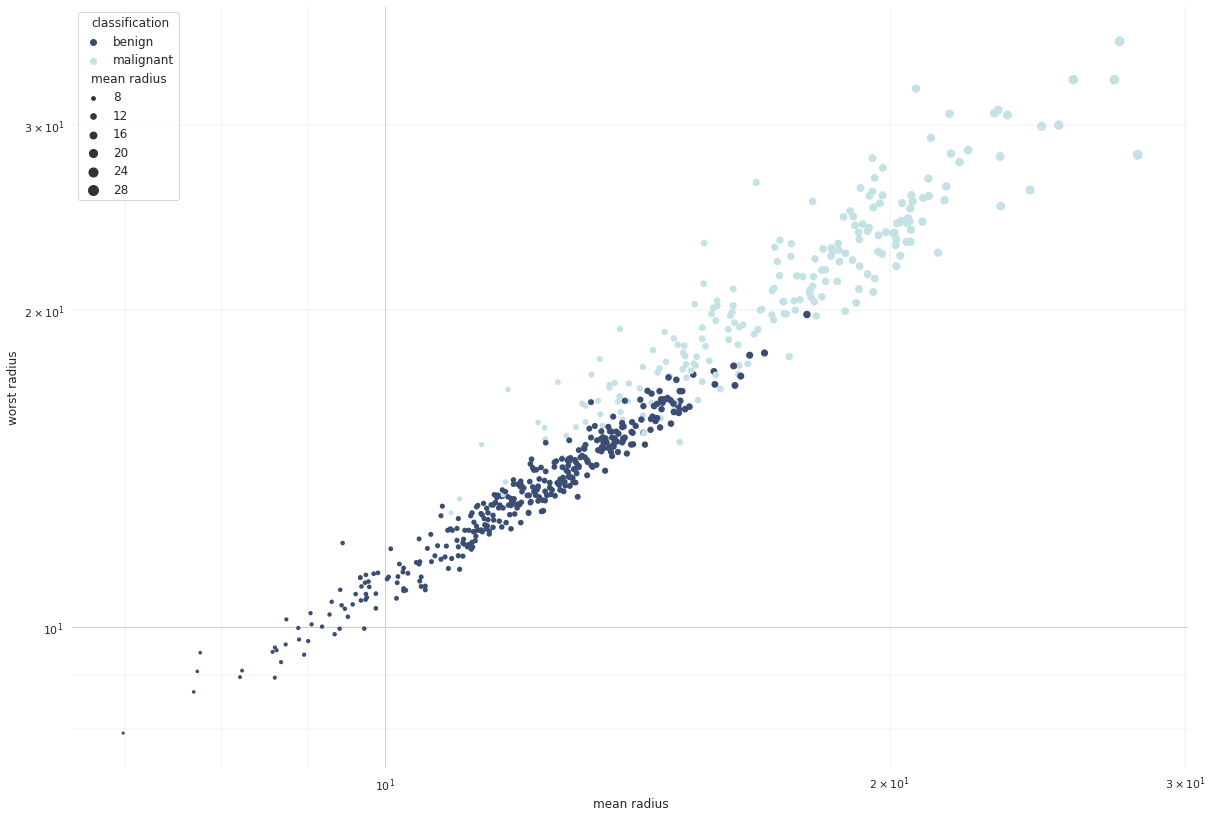

In [58]:
# scatterplot of the radius feature in log scale
selected_feature_scatterplot('radius')

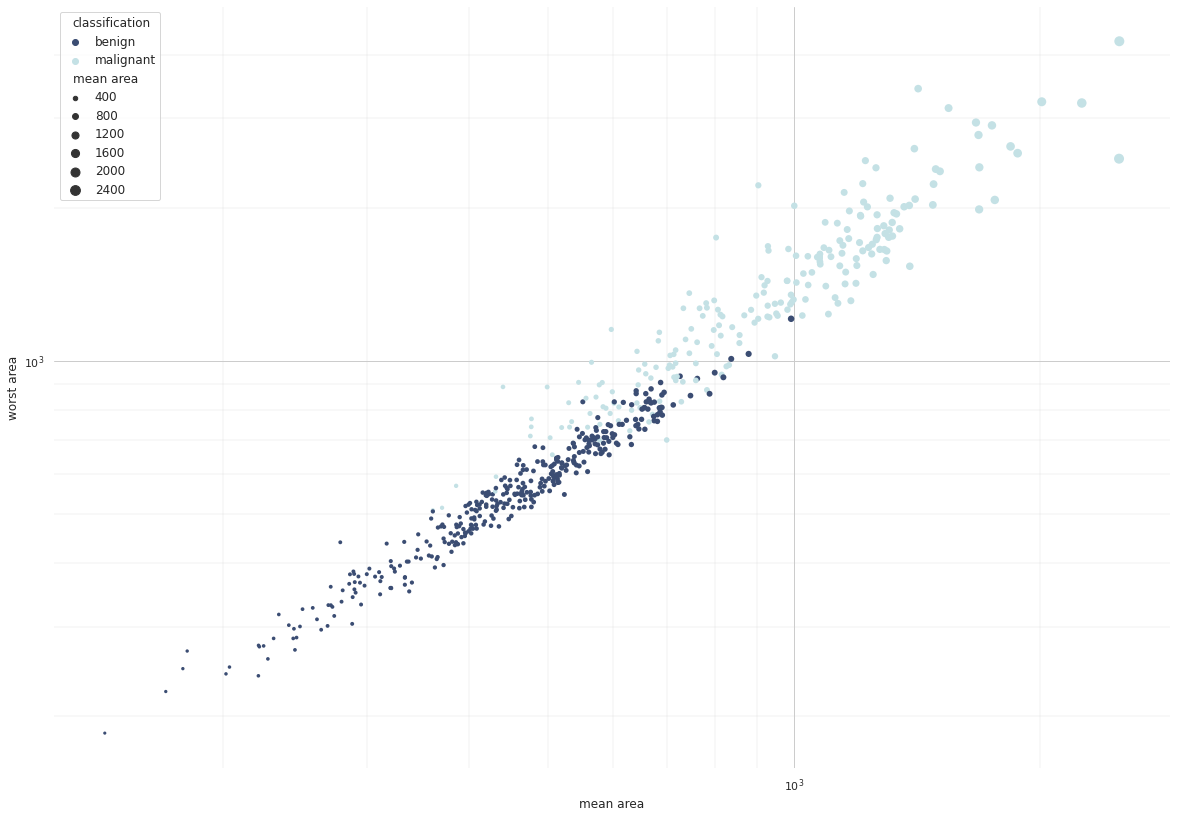

In [60]:
# scatterplot of the area feature in log scale
selected_feature_scatterplot('area')

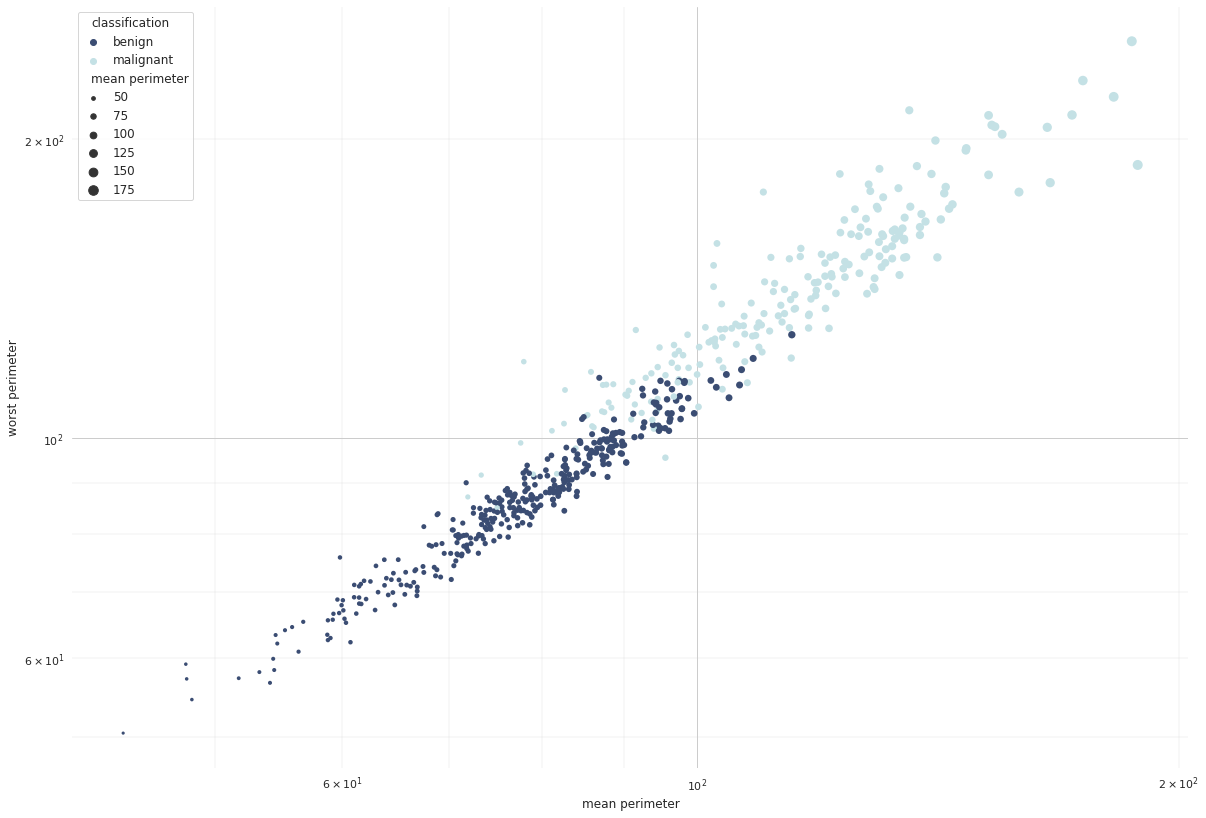

In [59]:
# scatterplot of the radius feature in log scale
selected_feature_scatterplot('perimeter')

---

In [ ]:
# Split data into training and validation sets
np.random.seed(0)
X = breast_cancer.drop(['target', 'classification'], axis = 1)
y = breast_cancer['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "LogisticRegression": LogisticRegression(max_iter = 10000), 
          "RandomForest": RandomForestClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "SVC": LinearSVC(max_iter = 100000),
          "SGDCLassifier": SGDClassifier(max_iter = 100000)
          }

# Create function to fit and score models
def fit_and_score(models, X_train, X_valid, y_train, y_valid):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_valid : validation data
    y_train : labels assosciated with training data
    y_valid : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_valid, y_valid)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'KNN': 0.9385964912280702,
 'LogisticRegression': 0.9473684210526315,
 'RandomForest': 0.9649122807017544,
 'AdaBoost': 0.956140350877193,
 'SVC': 0.9122807017543859,
 'SGDCLassifier': 0.9298245614035088}

## **Model Comparison**

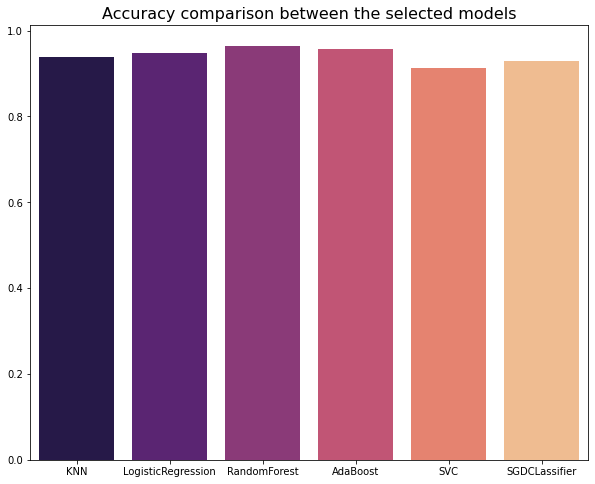

In [ ]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])

# simple bar graph comparison
plt.figure(figsize = (10,8))
g = sns.barplot(data = model_compare, palette = 'magma');
plt.title('Accuracy comparison between the selected models', fontsize = 16);

---

## **Hyperparameter Tuning and Cross-Validation**

In this case, we will select the top two models that has the best accuracy rating as shown in the bar chart above.

However, for study and learning purposes, we will make some changes to the **.hyperparameters**. of the model and evaluate them according to the result obtained.

**Note**: This is only a study case, so we don't need a perfect model using all **HyperParameters**.

In [ ]:
# Different RandomForestClassifier Hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10]}
           
# Different AdaBoostClassifier Hyperparameters
ada_grid = {"n_estimators": np.arange(10, 1000, 50),
            'algorithm': ['SAMME','SAMME.R']}

###  **Hyperparameter Tuning with `GridSearchCV`**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
## setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestClassifier
gs_rfc = GridSearchCV(RandomForestClassifier(), param_grid = rf_grid, cv = 5, verbose = True, error_score = 'raise')

# Fit Grid Hyperparameter Search Model
gs_rfc.fit(X_train, y_train)

In [ ]:
gs_rfc.best_params_

{'max_depth': None, 'n_estimators': 160}

In [ ]:
## setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for AdaBoostClassifier
gs_ada = GridSearchCV(AdaBoostClassifier(), param_grid = ada_grid, cv = 5, verbose = True, error_score = 'raise')

# Fit Grid Hyperparameter Search Model
gs_ada.fit(X_train, y_train)

In [ ]:
gs_ada.best_params_

{'algorithm': 'SAMME', 'n_estimators': 960}

### **Hyperparameter Tuning with `RandomizedSearchCV`**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
## setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv = 5, verbose = True, error_score = 'raise')

# Fit Grid Hyperparameter Search Model
rs_rfc.fit(X_train, y_train)

In [ ]:
rs_rfc.best_params_

{'n_estimators': 860, 'max_depth': 10}

In [ ]:
## setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for AdaBoostClassifier
rs_ada = RandomizedSearchCV(AdaBoostClassifier(), param_distributions = ada_grid, cv = 5, verbose = True, error_score = 'raise')

# Fit Grid Hyperparameter Search Model
rs_ada.fit(X_train, y_train)

In [ ]:
rs_ada.best_params_

{'n_estimators': 760, 'algorithm': 'SAMME'}

###  **Hyperparameter Tuning with `HalvingGridSearchCV`**

In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
## setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestClassifier
hs_rfc = HalvingGridSearchCV(RandomForestClassifier(), param_grid = rf_grid, cv = 5, verbose = True, error_score = 'raise')

# Fit Grid Hyperparameter Search Model
hs_rfc.fit(X_train, y_train)

In [ ]:
hs_rfc.best_params_

{'max_depth': 3, 'n_estimators': 460}

In [ ]:
## setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for AdaBoostClassifier
hs_ada = HalvingGridSearchCV(AdaBoostClassifier(), param_grid = ada_grid, cv = 5, verbose = True, error_score = 'raise')

# Fit Grid Hyperparameter Search Model
hs_ada.fit(X_train, y_train)

In [ ]:
hs_ada.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 760}

---

## **Evaluating a Classification Model**

In the following topics we are gonna evaluate our models according differents parameters.

It's valid to point that in this topic all the models will be evaluate without any hyperparameter and using only one "version" of the split data (will not be used `cross_val_score`)

Evaluations parameters:

* **ROC Curve and AUC Score**
* **Confusion Matrix** 
* **Accuracy**
* **Precision**
* **Recall** 
* **F1-score**

In [ ]:
def evaluate_model(y_true, y_pred):
  '''
  This function will evaluate a model according the scoring parameter of a classification model.
  Parameters: accuracy_score()
              precision_score()
              recall_score()
              f1_score()
  y_true: true values according the breast_cancer dataset
  y_pred: predictions values according each model
  '''
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average = 'micro')
  recall = recall_score(y_true, y_pred, average = 'micro')
  f1 = f1_score(y_true, y_pred, average = 'micro')

  metrics_dict = {'Accuracy': accuracy,
                 'Precision': precision,
                   'Recall': recall,
                  'F1': f1}
  #print(f"Accuracy  : {accuracy * 100:.2f}%")
  #print(f"Precision: {precision:.2f}")
  #print(f"Recall: {recall:.2f}")
  #print(f"F1 score: {f1:.2f}")

  return metrics_dict

In [ ]:
gs_ada = AdaBoostClassifier(algorithm ='SAMME', n_estimators = 960)

In [ ]:
# Make predictions using the AdaBoostClassifier on each model after changing some hyperparameters
y_preds_gs_rfc =  gs_rfc.predict(X_valid)
y_preds_rs_rfc = rs_rfc.predict(X_valid)
y_preds_hs_rfc = hs_rfc.predict(X_valid)

In [ ]:
# Make predictions using the AdaBoostClassifier on each model after changing some hyperparameters
y_preds_gs_ada =  gs_ada.predict(X_valid)
y_preds_rs_ada = rs_ada.predict(X_valid)
y_preds_hs_ada = hs_ada.predict(X_valid)

In [ ]:
# evaluating each RandomForestClassifier model 
gs_rfc_scores = evaluate_model(y_valid, y_preds_gs_rfc)
rs_rfc_scores = evaluate_model(y_valid, y_preds_rs_rfc)
hs_rfc_scores = evaluate_model(y_valid, y_preds_hs_rfc)

In [ ]:
# evaluating each RandomForestClassifier model 
gs_ada_scores = evaluate_model(y_valid, y_preds_gs_ada)
rs_ada_scores = evaluate_model(y_valid, y_preds_rs_ada)
hs_ada_scores = evaluate_model(y_valid, y_preds_hs_ada)

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
metrics = pd.DataFrame([gs_rfc_scores, rs_rfc_scores, hs_rfc_scores])
metrics['method'] = ['GridSearchCV', 'RandomizedSearchCV', 'HalvingGridSearchCV']

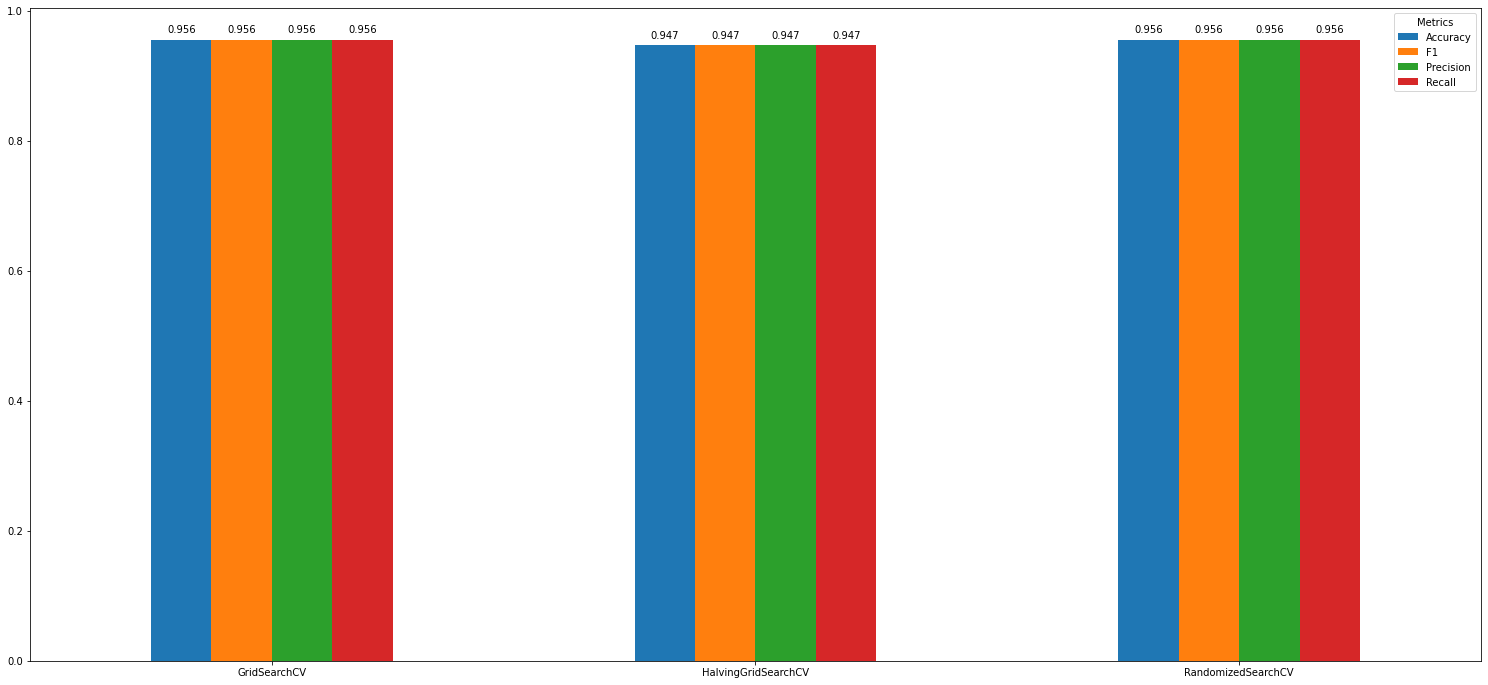

In [ ]:
# Visualization of metrics according to each adjustment method in the RandomForestClassifier model
df_pivot = pd.pivot_table(
	metrics,
	values= ['Accuracy',	'Precision',	'Recall', 'F1'	],
	index= 'method',
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot.bar()
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(26, 12)
# Change the axes labels
ax.set_xlabel("")
ax.tick_params(axis='x', rotation= 360)
ax.legend(title = 'Metrics');
show_values(ax)

In [ ]:
metrics = pd.DataFrame([gs_ada_scores, rs_ada_scores, hs_ada_scores])
metrics['method'] = ['GridSearchCV', 'RandomizedSearchCV', 'HalvingGridSearchCV']

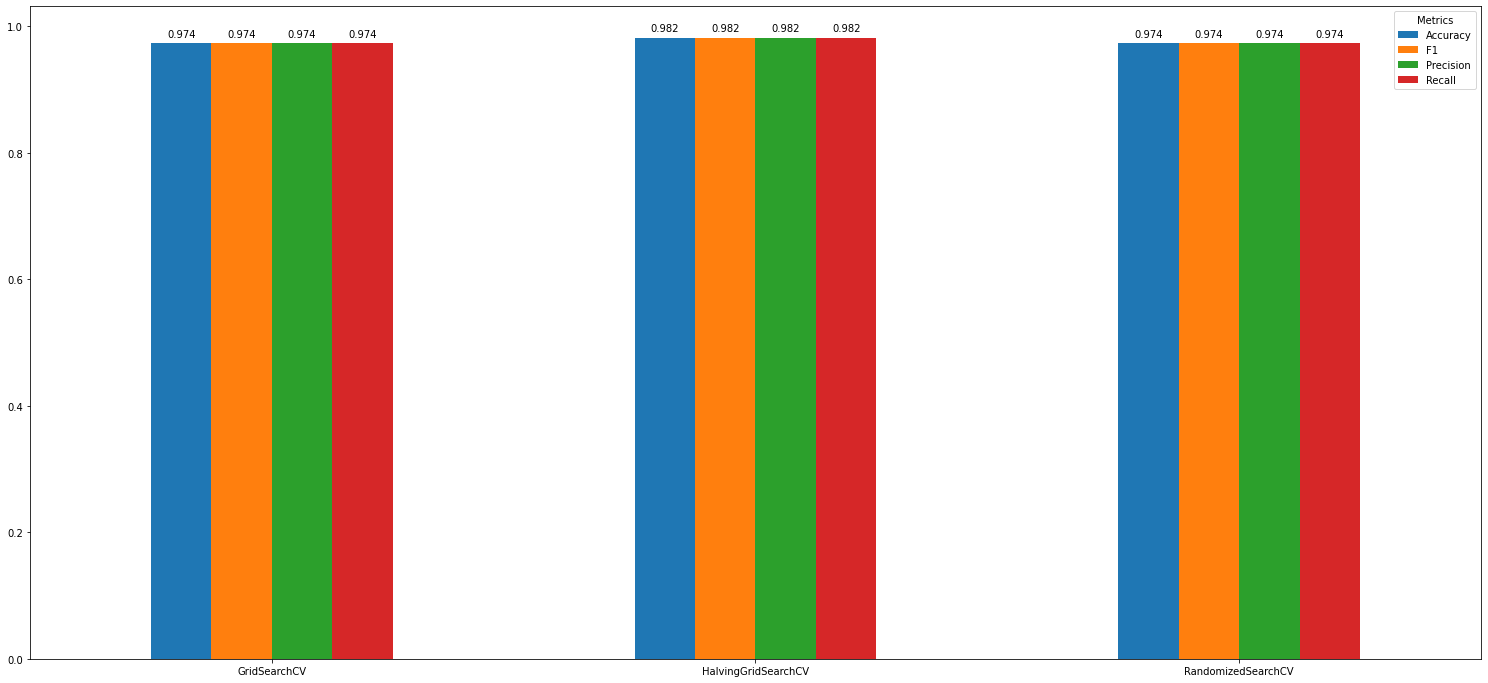

In [ ]:
# Visualization of metrics according to each adjustment method in the AdaBoostClassifier model
df_pivot = pd.pivot_table(
	metrics,
	values= ['Accuracy',	'Precision',	'Recall', 'F1'	],
	index= 'method',
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot.bar()
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(26, 12)
# Change the axes labels
ax.set_xlabel("")
ax.tick_params(axis='x', rotation= 360)
ax.legend(title = 'Metrics');
show_values(ax)

**As we can see, the AdaBoostClassifier using HalvingGridSearchCV Hyperparameters has the best results on each metric category.**

**With that in mind, we use this model for future analysis methods.**

---

## **ROC Curve and AUC Score**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
model = AdaBoostClassifier(algorithm ='SAMME.R', n_estimators = 760)
model.fit(X_train, y_train);
y_preds = model.predict(X_valid)

In [ ]:
# calculating AUROC SCORE
ada_auc = roc_auc_score(y_valid, y_preds)

In [ ]:
# calculating ROC CURVE
ada_fpr, ada_tpr, _ = roc_curve(y_valid, y_preds)

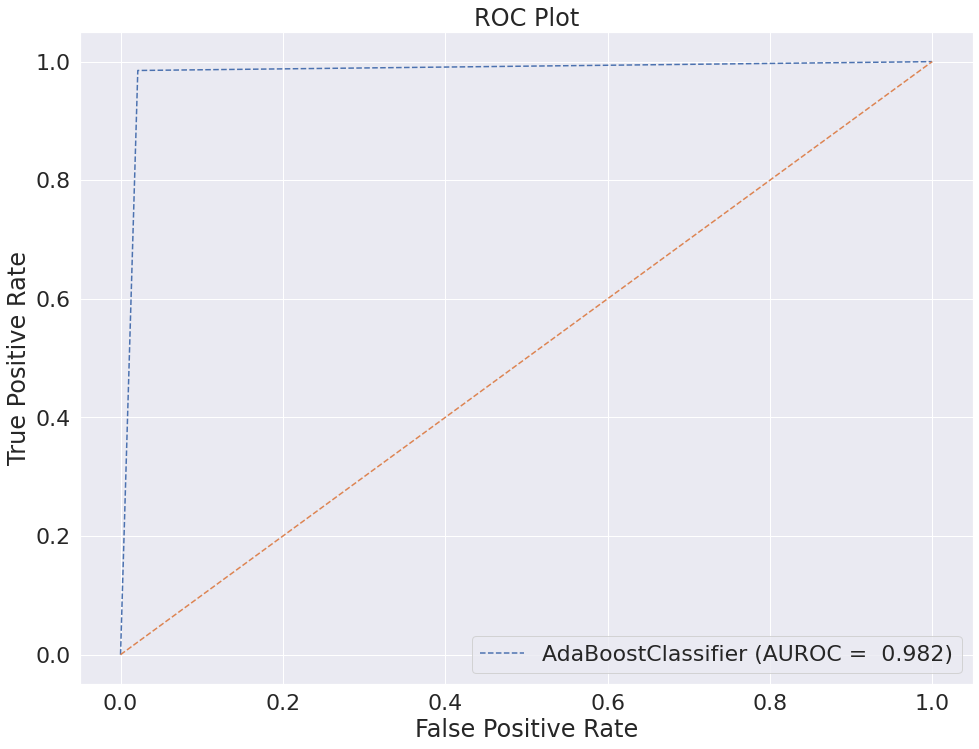

In [ ]:
plt.figure(figsize = (16, 12))
plt.plot(ada_fpr, ada_tpr, linestyle = '--', label = 'AdaBoostClassifier (AUROC = % 0.3f)' %ada_auc)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle = '--')

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

---

## **Confusion Matrix**

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using confusion_matrix() and passing it the true labels and predicted labels.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True,  cbar=False)
    sns.set(font_scale=2.0)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

In [ ]:
model = AdaBoostClassifier(algorithm ='SAMME.R', n_estimators = 760)

In [ ]:
model.fit(X_train, y_train)

y_preds = model.predict(X_valid)

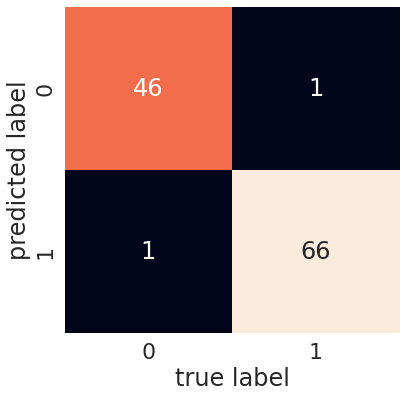

In [ ]:
# AdaBoostClassifier Model Confusion Matrix
plot_conf_mat(y_valid, y_preds)

---

## **Classification Report**

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### **Classification Report using `classification_report()` Method**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# AdaBoostClassifier Model classification report using classification_report() method
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### **Classification Report using `scoring` Parameter**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
np.random.seed(0)
def scoring_classification_report(model):
  cv_acc  = np.mean(cross_val_score(model, X, y, cv=5, scoring="accuracy"))
  cv_prec = np.mean(cross_val_score(model, X, y, cv=5, scoring="precision_micro"))
  cv_rec  = np.mean(cross_val_score(model, X, y, cv=5, scoring="recall_micro"))
  cv_f1   = np.mean(cross_val_score(model, X, y, cv=5, scoring="f1_micro"))

  cv_report = pd.DataFrame({'Accuracy': cv_acc, 'Precision': cv_prec, 'Recall': cv_rec, 'F1': cv_f1}, index = [0])

  return cv_report

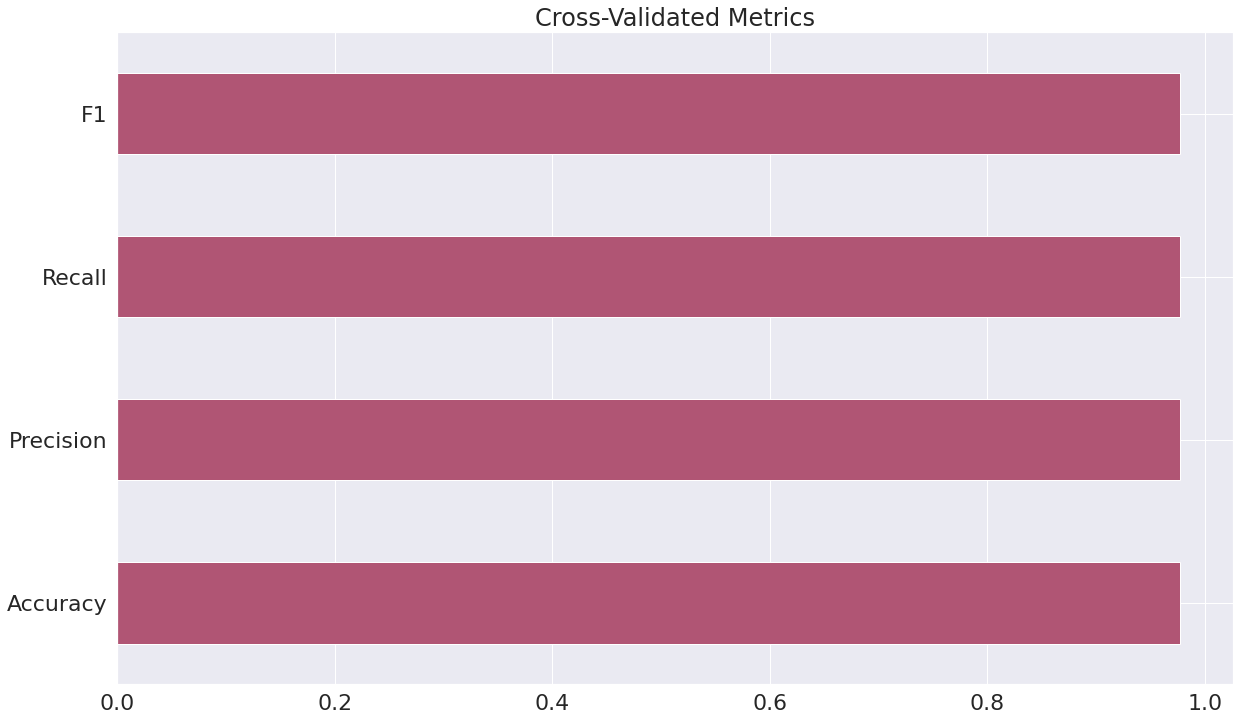

In [ ]:
# AdaBoostClassifier Model classification report using scoring parameters
cv_metrics = scoring_classification_report(model)
ax = cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#b05574');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

---

## **Feature importance**

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

**The larger the value (bigger bar), the more the feature contributes to the models decision.**

**If the value is negative, it means there's a negative correlation. And vice versa for positive values.**

In [ ]:
model = AdaBoostClassifier(algorithm ='SAMME.R', n_estimators = 760)

In [ ]:
# Fit an instance of LogisticRegression (taken from above)
np.random.seed(0)
model.fit(X_train, y_train);

In [ ]:
# Check coef_
model.feature_importances_

array([0.        , 0.06447368, 0.00394737, 0.03157895, 0.05263158,
       0.06184211, 0.01710526, 0.04736842, 0.02105263, 0.00921053,
       0.01447368, 0.04210526, 0.02105263, 0.09736842, 0.01710526,
       0.025     , 0.01973684, 0.01578947, 0.02894737, 0.06973684,
       0.02368421, 0.08421053, 0.03815789, 0.03026316, 0.03026316,
       0.00789474, 0.05      , 0.03815789, 0.01842105, 0.01842105])

In [ ]:
# Match features to columns
features_dict = dict(zip(breast_cancer.drop(['target', 'classification'], axis = 1).columns, list(model.feature_importances_)))
features_dict

{'mean radius': 0.0,
 'mean texture': 0.06447368421052632,
 'mean perimeter': 0.003947368421052632,
 'mean area': 0.031578947368421054,
 'mean smoothness': 0.05263157894736842,
 'mean compactness': 0.06184210526315789,
 'mean concavity': 0.017105263157894738,
 'mean concave points': 0.04736842105263158,
 'mean symmetry': 0.021052631578947368,
 'mean fractal dimension': 0.009210526315789473,
 'radius error': 0.014473684210526316,
 'texture error': 0.042105263157894736,
 'perimeter error': 0.021052631578947368,
 'area error': 0.09736842105263158,
 'smoothness error': 0.017105263157894738,
 'compactness error': 0.025,
 'concavity error': 0.019736842105263157,
 'concave points error': 0.015789473684210527,
 'symmetry error': 0.02894736842105263,
 'fractal dimension error': 0.06973684210526315,
 'worst radius': 0.02368421052631579,
 'worst texture': 0.08421052631578947,
 'worst perimeter': 0.038157894736842106,
 'worst area': 0.030263157894736843,
 'worst smoothness': 0.030263157894736843,


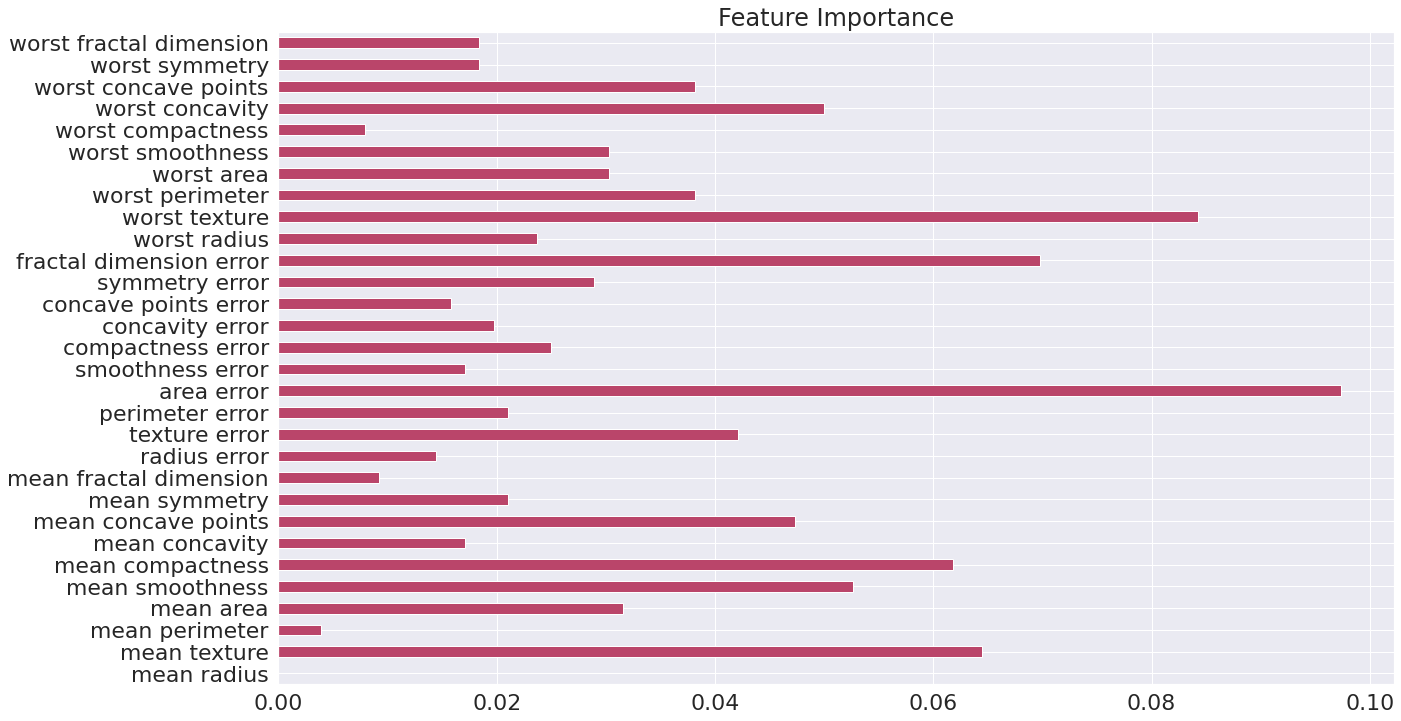

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
ax = features_df.T.plot.barh(title="Feature Importance", legend=False, color = '#ba456a');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

---

## **Comparing Model Prediction**

In this topic we're gonna take a visualy comparison between the expected values showed in the **breast cancer** dataset against the predictions made for each model.

In [ ]:
from matplotlib.lines import Line2D

In [ ]:
def histkde_comparsion_graph(model, y_preds):
  variables = [y_preds, np.array(y_valid)]

  custom = [Line2D([], [], marker='.', color='#536d88', linestyle='None'),
            Line2D([], [], marker='.', color='#ffb884', linestyle='None')]

  fig, axs = plt.subplots(ncols = 2, figsize = (24,12))
  fig.suptitle('A Histogram and KDE graph for comparsion between the actual values and the pred values', fontsize = 20);

  sns.histplot(data = variables, ax = axs[0])
  axs[0].set_title(f'Target distribution comparison {model} Model', fontsize = 18);
  sns.kdeplot(data = variables, shade = True ,ax = axs[1])
  axs[1].set_title( f'Target density comparison {model} Model', fontsize = 18);


  for col in range(2):
    axs[col].legend(custom, [model, 'Breast Cancer Data Set', ],loc = 'upper left');

In [ ]:
# Comparing the AdaBoostClassifier Model predictions
model = AdaBoostClassifier(algorithm ='SAMME.R', n_estimators = 760)
model.fit(X_train, y_train)
y_preds = model.predict(X_valid)

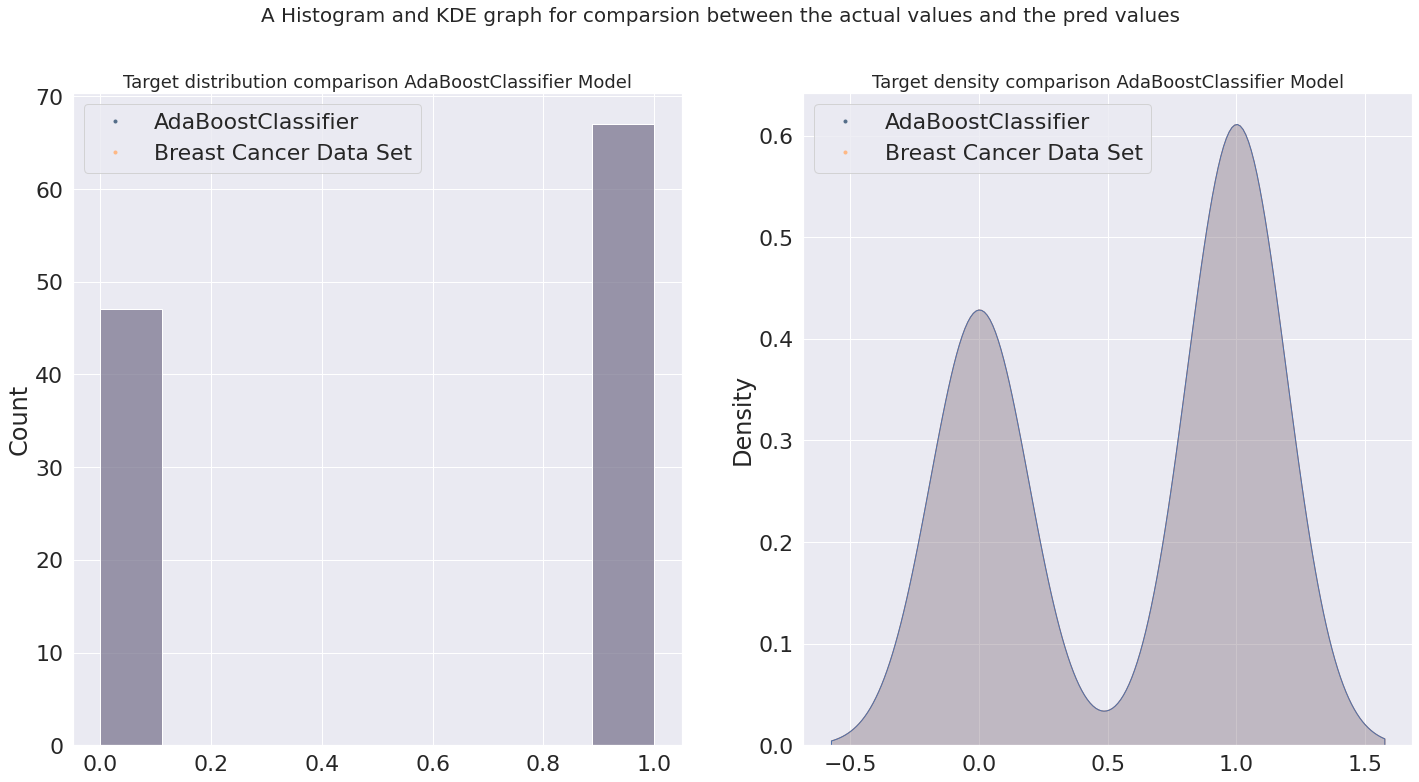

In [ ]:
histkde_comparsion_graph('AdaBoostClassifier', y_preds)